# Customer Segmentation using K-Means Clustering

## Objective
Segment customers based on **Age**, **Annual Income**, and **Spending Score** using **K-Means clustering**.  
The output segments can help businesses run targeted marketing campaigns and improve customer strategy.


In [1]:
# Core libraries for data handling
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for clustering and scaling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## 1) Load Dataset
We load the customer dataset that contains demographic information and spending behavior.


In [4]:
# Load the dataset from the data folder (relative path from notebooks/)
df = pd.read_csv("../data/customer_data.csv")

# Preview first few rows to confirm data load
df.head()


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15000,39
1,2,Female,21,16000,81
2,3,Male,20,17000,6
3,4,Female,23,18000,77
4,5,Male,31,19000,40


## 2) Basic Data Checks
We check:
- dataset shape
- column types
- missing values
- summary statistics


In [5]:
# Check number of rows and columns
print("Dataset Shape:", df.shape)

# Check datatypes and non-null counts
df.info()

# Check missing values (should be zero for a clean dataset)
df.isnull().sum()

# Summary statistics to understand range of values
df.describe()


Dataset Shape: (50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     50 non-null     int64 
 1   Gender         50 non-null     object
 2   Age            50 non-null     int64 
 3   AnnualIncome   50 non-null     int64 
 4   SpendingScore  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


,CustomerID,Age,AnnualIncome,SpendingScore
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,35.980000,39500.000000,53.180000
std,14.57738,11.557293,14577.379737,22.012696
min,1.00000,19.000000,15000.000000,3.000000
25%,13.25000,28.000000,27250.000000,45.250000
50%,25.50000,35.000000,39500.000000,55.000000
75%,37.75000,42.750000,51750.000000,63.750000
max,50.00000,67.000000,64000.000000,99.000000


## 3) Exploratory Data Analysis (EDA)
We visualize distributions of Age, Annual Income, and Spending Score to understand customer variability.


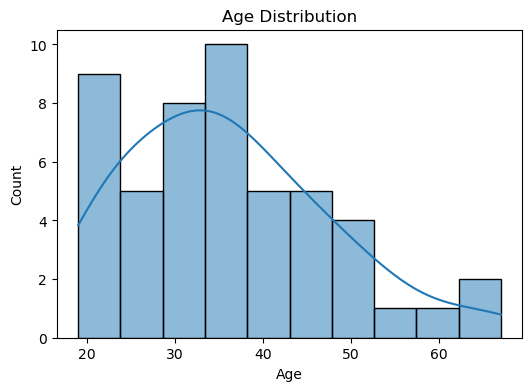

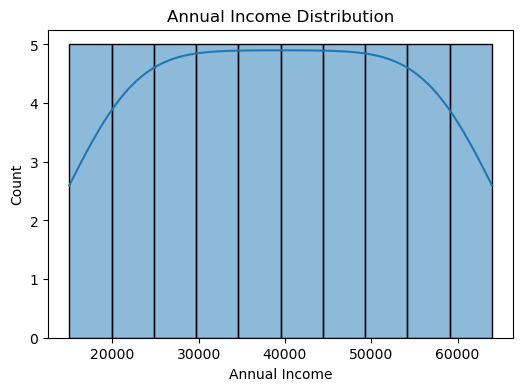

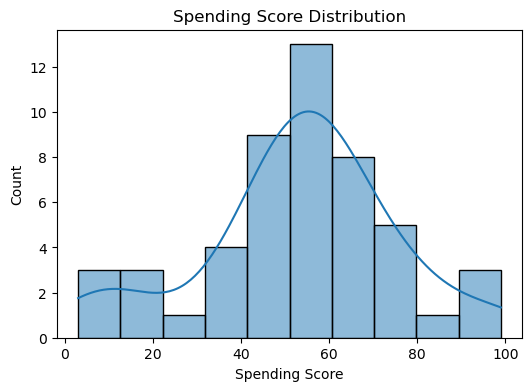

In [6]:
# Plot Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot Annual Income distribution
plt.figure(figsize=(6,4))
sns.histplot(df["AnnualIncome"], bins=10, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

# Plot Spending Score distribution
plt.figure(figsize=(6,4))
sns.histplot(df["SpendingScore"], bins=10, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


## 4) Feature Selection
For clustering, we select meaningful numeric behavior variables:
- Age
- Annual Income
- Spending Score

We do NOT use:
- CustomerID (just an identifier)
- Gender (optional for clustering; we keep the model simple and explainable)


In [7]:
# Select features for clustering
X = df[["Age", "AnnualIncome", "SpendingScore"]]

# Quick preview
X.head()


,Age,AnnualIncome,SpendingScore
0,19,15000,39
1,21,16000,81
2,20,17000,6
3,23,18000,77
4,31,19000,40


## 5) Feature Scaling (Very Important)
K-Means is distance-based.  
Scaling ensures that Annual Income does not dominate the clustering just because it has larger numeric values.


In [8]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display first few scaled rows
X_scaled[:5]


array([[-1.48411832, -1.69774938, -0.65071372],
       [-1.30931051, -1.62845348,  1.27664708],
       [-1.39671441, -1.55915759, -2.16506863],
       [-1.1345027 , -1.4898617 ,  1.09308891],
       [-0.43527145, -1.4205658 , -0.60482417]])

## 6) Choosing the Optimal Number of Clusters (Elbow Method)
We test K from 1 to 10 and plot WCSS (inertia).  
The “elbow” point indicates a good balance between:
- fewer clusters (simple)
- lower error (better fit)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

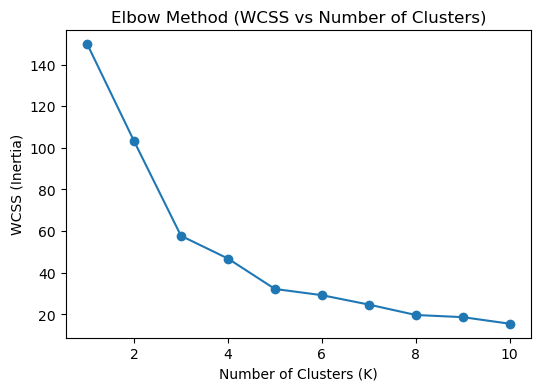

In [10]:
wcss = []

# Try different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

# Plot the Elbow curve
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method (WCSS vs Number of Clusters)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.show()


## 7) Train Final K-Means Model
Based on the elbow curve, we choose **K = 4** clusters.  
This is usually a good, interpretable segmentation size for portfolio projects.


In [11]:
# Train K-Means model with chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit and predict clusters
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Preview results with Cluster column
df.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15000,39,1
1,2,Female,21,16000,81,2
2,3,Male,20,17000,6,1
3,4,Female,23,18000,77,2
4,5,Male,31,19000,40,1


## 8) Cluster Summary (Business View)
We compute average Age, Income, Spending per cluster to interpret segments.


In [12]:
# Group by cluster and compute mean values for interpretation
cluster_summary = df.groupby("Cluster")[["Age", "AnnualIncome", "SpendingScore"]].mean().round(2)
cluster_summary


,Age,AnnualIncome,SpendingScore
Cluster,,,
0,52.17,26333.33,13.33
1,28.30,31100.00,46.10
2,25.50,25000.00,81.90
3,39.50,52333.33,54.12


## 9) Visualize Customer Segments
We plot clusters to visually understand patterns:
1. Annual Income vs Spending Score
2. Age vs Spending Score


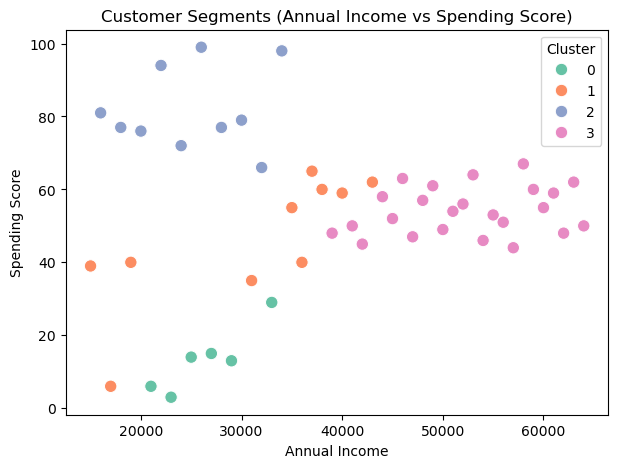

In [14]:
# Visualize clusters: Annual Income vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="AnnualIncome",
    y="SpendingScore",
    hue="Cluster",
    palette="Set2",
    s=80
)
plt.title("Customer Segments (Annual Income vs Spending Score)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


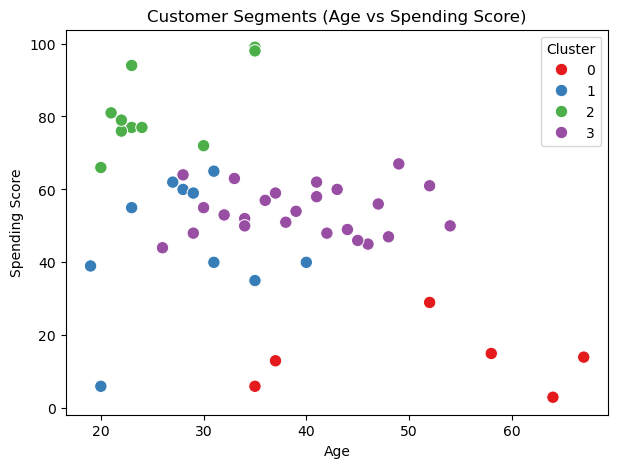

In [15]:
# Visualize clusters: Age vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Age",
    y="SpendingScore",
    hue="Cluster",
    palette="Set1",
    s=80
)
plt.title("Customer Segments (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()


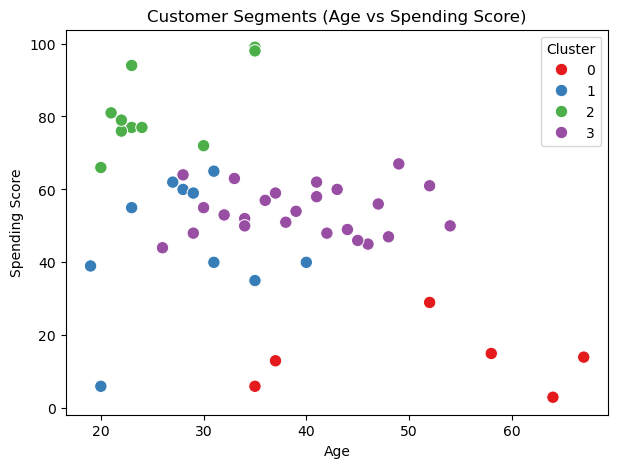

In [16]:
# Visualize clusters: Age vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Age",
    y="SpendingScore",
    hue="Cluster",
    palette="Set1",
    s=80
)
plt.title("Customer Segments (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()


## 10) Business Interpretation (Example Segments)

After clustering, we can label segments in business terms, for example:

- **Cluster A:** High income, high spending → Premium customers  
- **Cluster B:** Low income, low spending → Budget customers  
- **Cluster C:** High income, low spending → Careful spenders  
- **Cluster D:** Low income, high spending → Deal-driven / impulsive customers  

### How businesses use this:
- Premium cluster → loyalty + premium offers  
- Budget cluster → discounts + value bundles  
- Careful spenders → trust-building and targeted recommendations  
- High spend / low income → promotions + limited-time offers


In [18]:
# Save clustered dataset for future reporting / dashboard use
df.to_csv("../data/customer_data_with_clusters.csv", index=False)
print("Saved: customer_data_with_clusters.csv")


Saved: customer_data_with_clusters.csv
